In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, wget, shutil, math
from math import sqrt
from scipy.stats import pearsonr
from itertools import combinations
from rich import print as pprint
import warnings, random
warnings.filterwarnings("ignore")
#from scipy.stats import multivariate_normal
# https://www.statisticshowto.com/ancova/

In [3]:

random.seed(42)

subjects = [{'Weight': round(random.uniform(50, 100), 1),
             'Height': round(random.uniform(1.5, 1.8), 2)} 
            for _ in range(5)]

weights = [subject['Weight'] for subject in subjects]
heights = [subject['Height'] for subject in subjects]

def cov(data):
    n = len(data)
    means = [sum(col) / n for col in zip(*data)]
    
    p = len(data[0])
    cov_matrix = [[0.0] * p for _ in range(p)]
    
    for i in range(p):
        for j in range(p):
            covariance = sum((data[k][i] - means[i]) * (data[k][j] - means[j]) 
                           for k in range(n)) / (n - 1)
            cov_matrix[i][j] = covariance
    
    return cov_matrix

data = [[w, h] for w, h in zip(weights, heights)]
cov_manual = cov(data)
print("manual:")
print(cov_manual)

cov_numpy = np.cov([weights, heights])
print(f"\nnp:")
print(cov_matrix_numpy)


manual:
[[151.1180, 0.1759]
 [0.1759, 0.0064]]

p:
[[1.51118e+02 1.75950e-01]
 [1.75950e-01 6.38000e-03]]


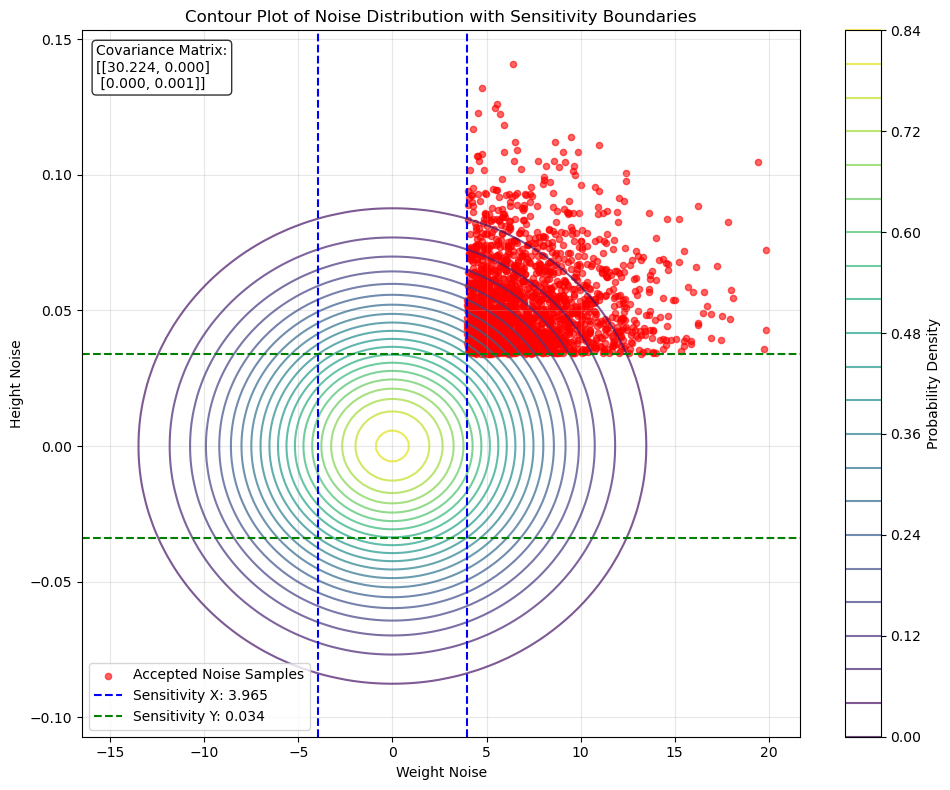

Covariance Matrix:
[[3.02236e+01 0.00000e+00]
 [0.00000e+00 1.27600e-03]]

Sensitivity: [3.965 0.034]

Number of noise samples: 2000


In [3]:

np.random.seed(42)
random.seed(42)

subjects = [{'Weight': round(random.uniform(50, 100), 1),
             'Height': round(random.uniform(1.5, 1.8), 2)} 
            for _ in range(5)]
df = pd.DataFrame(subjects)


def user_output(data):
    return np.array([np.mean(data, axis=0)])
def dp_2d(clean_data, pipeline_output):
    
    loo_output = np.array([np.mean(np.delete(clean_data,i,axis=0), 0) for i in range(clean_data.shape[0])])
    loo_scale = np.std(loo_output, axis=0)
    sensitivity = np.max(np.abs(loo_output - pipeline_output), 0)
    cov = np.diag((2 * loo_scale)**2)

    noise_samples = []
    for _ in range(2000):
        while True:
            noise = multivariate_normal(mean=[0, 0], cov=cov).rvs()
            if np.all(noise >= sensitivity):
                noise_samples.append(noise)
                break
    
    return np.array(noise_samples), sensitivity, cov

noise_samples, sensitivity, cov = dp_2d(df.values, user_output(df.values))

plt.figure(figsize=(10, 8))

x = np.linspace(-3 * np.sqrt(cov[0, 0]), 3 * np.sqrt(cov[0, 0]), 100)
y = np.linspace(-3 * np.sqrt(cov[1, 1]), 3 * np.sqrt(cov[1, 1]), 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

rv = multivariate_normal([0, 0], cov)
Z = rv.pdf(pos)

contour = plt.contour(X, Y, Z, levels=20, cmap='viridis', alpha=0.7)
plt.colorbar(contour, label='Probability Density')

plt.scatter(noise_samples[:, 0], noise_samples[:, 1], alpha=0.6, 
           color='red', s=20, label='Accepted Noise Samples')

plt.axvline(x=sensitivity[0], color='blue', linestyle='--', label=f'Sensitivity X: {sensitivity[0]:.3f}')
plt.axvline(x=-sensitivity[0], color='blue', linestyle='--')
plt.axhline(y=sensitivity[1], color='green', linestyle='--', label=f'Sensitivity Y: {sensitivity[1]:.3f}')
plt.axhline(y=-sensitivity[1], color='green', linestyle='--')

plt.xlabel('Weight Noise')
plt.ylabel('Height Noise')
plt.title('Contour Plot of Noise Distribution with Sensitivity Boundaries')
plt.legend(loc=3)
plt.grid(True, alpha=0.3)

cov_text = f'Covariance Matrix:\n[[{cov[0,0]:.3f}, {cov[0,1]:.3f}]\n [{cov[1,0]:.3f}, {cov[1,1]:.3f}]]'
plt.text(0.02, 0.98, cov_text, transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

print("Covariance Matrix:")
print(cov)
print(f"\nSensitivity: {sensitivity}")
print(f"\nNumber of noise samples: {len(noise_samples)}")

In [87]:
subjects = [{'Weight': round(random.uniform(50, 100), 1),
             'Height': round(random.uniform(1.5, 1.8), 2)} 
            for _ in range(5)]

df = pd.DataFrame(subjects)
df = np.array(df)
off_d = np.cov([df[:,0],df[:,1]])

loo_output = np.array([np.mean(np.delete(df,i,axis=0), 0) for i in range(df.shape[0])])
loo_scale = np.std(loo_output, axis=0)
cov = np.diag((2 * loo_scale)**2)


combined = np.array(off_d)   
np.fill_diagonal(combined, np.diag(cov)) 

pprint(off_d)
pprint(cov)
pprint(combined)

[[2.19257e+02 1.66400e-01]
 [1.66400e-01 9.68000e-03]]

[[4.38514e+01 0.00000e+00]
 [0.00000e+00 1.93600e-03]]

[[4.38514e+01 1.66400e-01]
 [1.66400e-01 1.93600e-03]]

In [5]:
c_mean = [1, 2, 3, 4]
c_cov = [[2, 1, 0.5, 0.3],
             [1, 2, 0.4, 0.2],
             [0.5, 0.4, 2, 0.1],
             [0.3, 0.2, 0.1, 2]]
test = multivariate_normal(mean=c_mean, cov=c_cov, size = 2)
print(test, test.shape)

[[-0.21506478  1.85903313  4.53594641  4.2686937 ]
 [ 0.54640363  0.88878916  1.77278151  4.0459722 ]]
(2, 4)

In [26]:
from numba import njit, prange
subjects = [{'Weight': round(random.uniform(50, 100), 1),
             'Height': round(random.uniform(1.5, 1.8), 2)} 
            for _ in range(5)]
df = pd.DataFrame(subjects)
#@njit
def user_output(data):
    return np.array([np.mean(data, axis=0)])

def dp_2d(data, pipeline_output):

    off_d = np.cov([data[:,0],data[:,1]])
    loo_output = np.array([np.mean(np.delete(data,i,axis=0), 0) for i in range(data.shape[0])])
    loo_scale = np.std(loo_output, axis=0)
    sensitivity = np.max(np.abs(loo_output - pipeline_output), 0)
    cov = np.diag((2 * loo_scale)**2) 

    combined = np.abs(np.array(off_d))   
    np.fill_diagonal(combined, np.diag(cov)) 
    while True:
        noise = multivariate_normal(mean=[0, 0], cov=combined)#.rvs()
        if np.all(noise >= sensitivity):
            break
    noisy_output = pipeline_output + noise
    
    return noisy_output, sensitivity

def iqr_bounds(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return iqr, lower_bound, upper_bound

def outlier_(value, lower, upper):
    
    return np.all(value < lower) or np.all(value > upper)


In [31]:
#@njit(parallel=True)
def sim_2d(n_replicates, subsample_sizes, OL=True):    
    id_dr = {size: np.zeros(size) for size in subsample_sizes}  
    counts = {size: 0 for size in subsample_sizes}
    reconstructed = {size: [] for size in subsample_sizes}
    true_means_ = {size: [] for size in subsample_sizes}
    sensitivities_ = {size: [] for size in subsample_sizes}
    error_ = {size: [] for size in subsample_sizes}
    
    for n in range(n_replicates):
        subjects = [{'Weight': round(random.uniform(50, 100), 1),
                     'Height': round(random.uniform(1.5, 1.8), 2)} 
                    for _ in range(200)]
        df = pd.DataFrame(subjects)

        for size in subsample_sizes:
            subsample = df.iloc[:size].copy()

            if OL:
                subsample.iloc[0, subsample.columns.get_loc("Weight")] = 10.0 
                subsample.iloc[0, subsample.columns.get_loc("Height")] = 10.0 
            else:
                pass

            true_mean = user_output(subsample)  
            true_means_[size].append(true_mean)
            loo_data = [subsample.drop(index=i) for i in range(len(subsample))]
            
            noisy_outputs = []
            sens_outputs = []

            for loo_subset in loo_data:
                output = user_output(loo_subset)
                noisy_output, sensitivity_ = dp_2d(np.array(loo_subset), output)
                noisy_outputs.append(noisy_output)
                sens_outputs.append(sensitivity_)
            noisy_outputs = np.array(noisy_outputs)   
            coeff_mat = np.ones((size, size)) - np.eye(size)
            recons = []
            for dim in range(noisy_outputs.shape[1]):  
                recons_dim = np.linalg.solve(coeff_mat, (size - 1) * noisy_outputs[:, dim])
                recons.append(recons_dim)
            recons = np.stack(recons, axis=1) 
            
            reconstructed[size].append(recons)
            sensitivities_[size].append(sens_outputs)

            subsample_array = subsample[['Weight', 'Height']].to_numpy()
            recons_error = np.mean(np.linalg.norm(recons - subsample_array, axis=1))
            error_[size].append(recons_error)
            iqr_, lower_b, upper_b = iqr_bounds(recons[:,0])
            
            if outlier_(recons[0,0], lower_b, upper_b):
                counts[size] += 1
                
            for idx in range(size):
                if outlier_(recons[idx,0], lower_b, upper_b):
                    id_dr[size][idx] += 1
                    
    return id_dr, counts, reconstructed, sensitivities_, error_




In [39]:
n_replicates = 1000
subsample_sizes = [20, 40, 60, 80, 100]

id_dr_OL, counts_OL, reconstructed_OL, sensitivities_OL, error_OL = sim_2d(n_replicates, subsample_sizes, OL=True)
id_dr, counts, reconstructed, sensitivities_, error_ = sim_2d(n_replicates, subsample_sizes, OL=False)

In [51]:
np.array(sensitivities_[20]).shape

(1000, 20, 2)

In [57]:
type(sensitivities_)

dict

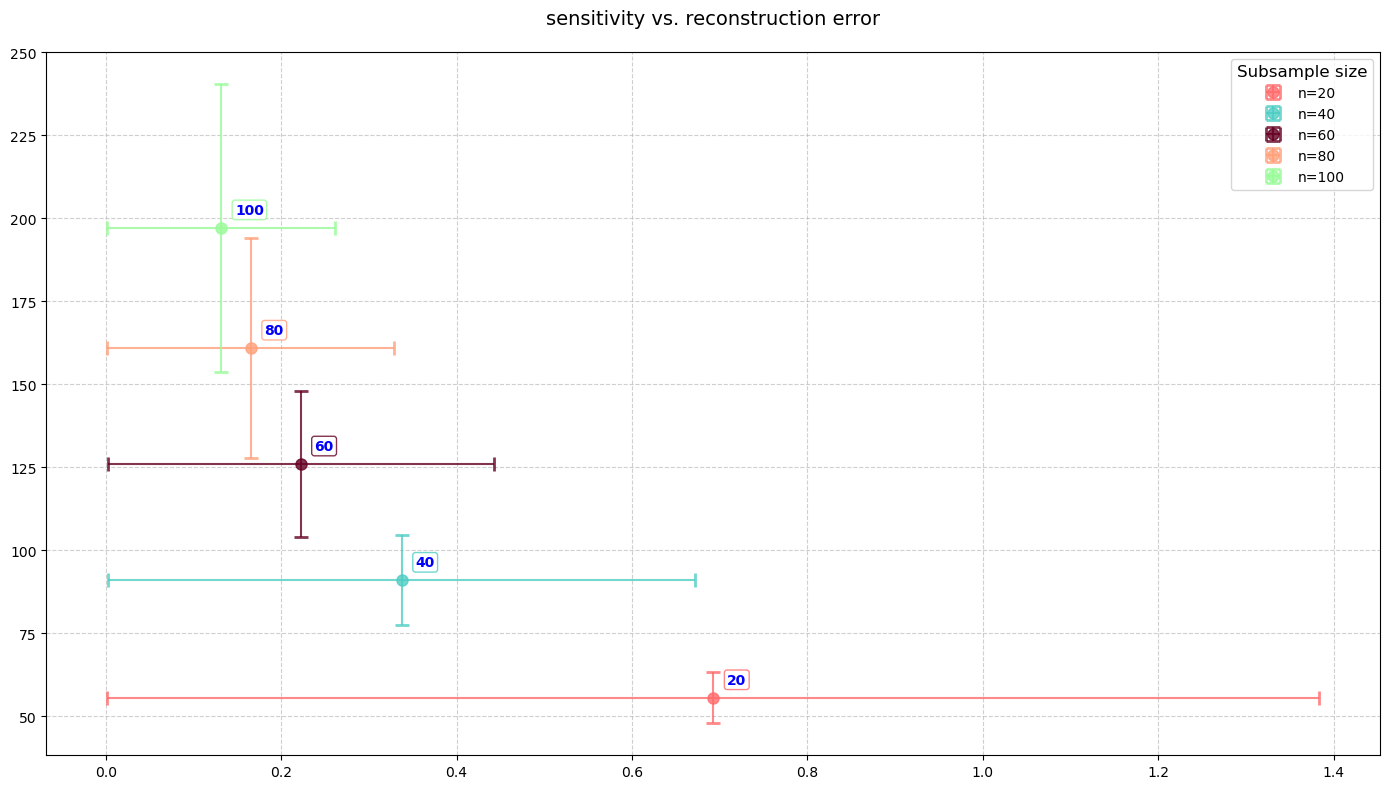

In [113]:
plt.figure(figsize=(14, 8))

for size in subsample_sizes:
    sens_array = np.array(sensitivities_[size])
    err_array = np.array(error_[size])
    
    mean_sens = np.mean(sens_array)
    mean_err = np.mean(err_array)
    std_sens = np.std(sens_array)
    std_err = np.std(err_array)
    
    plt.errorbar(mean_sens, mean_err, 
                xerr=std_sens, yerr=std_err,
                fmt='o', 
                color=color_map.get(size, '#000000'),
                markersize=8,
                capsize=5,
                capthick=2,
                alpha=0.8,
                label=f'n={size}')
    
    plt.annotate(f'{size}',
                 xy=(mean_sens, mean_err),
                 xytext=(10, 10),
                 textcoords='offset points',
                 fontsize=10,
                 fontweight='bold',
                 color="b",
                 bbox=dict(boxstyle='round,pad=0.2',
                           fc='white',
                           ec=color_map.get(size, '#000000'),
                           alpha=0.8))


plt.title('sensitivity vs. reconstruction error',
          fontsize=14, pad=20)

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Subsample size', title_fontsize=12)
plt.tight_layout()
plt.show()

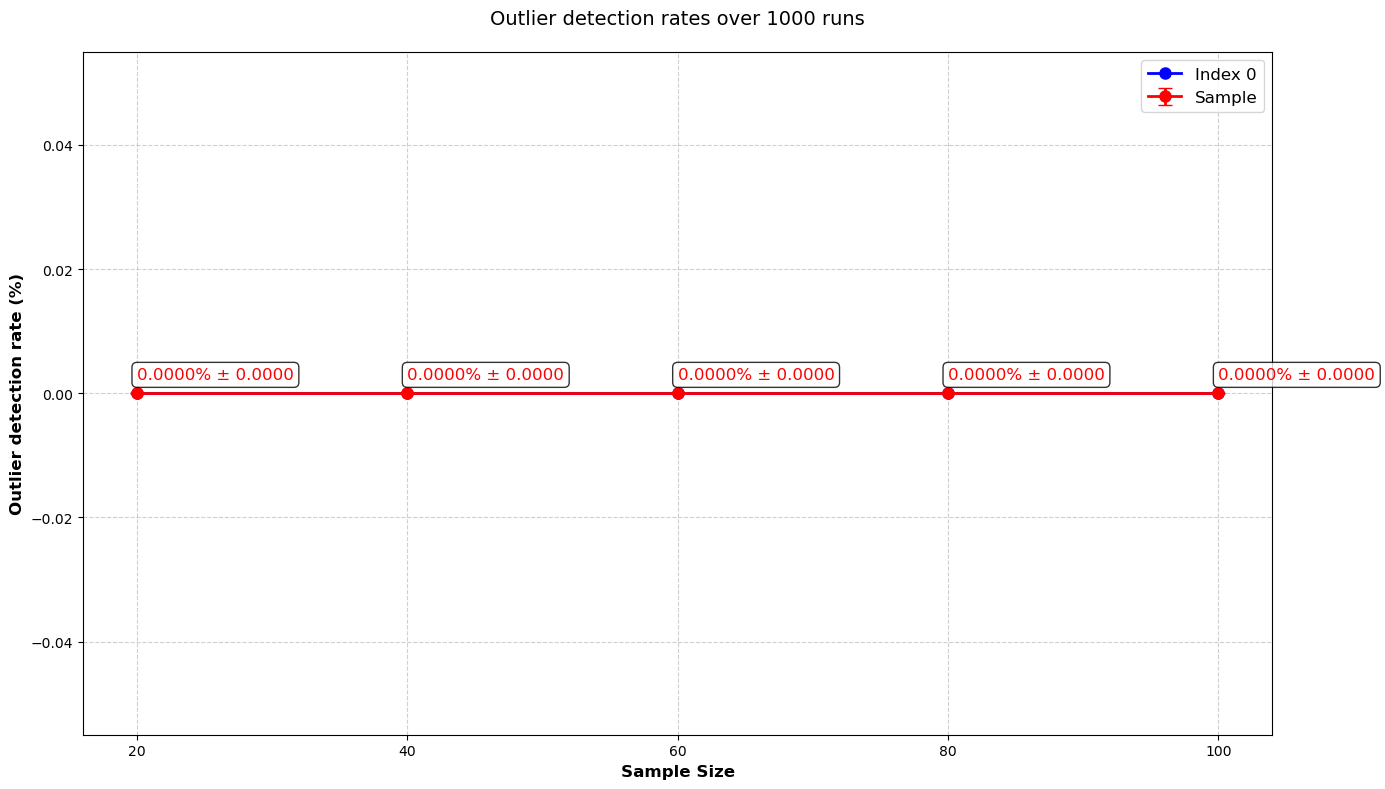

In [114]:
detection_rates = (np.array(list(counts_OL.values())) / n_replicates) * 100  
prc = (np.array([id_dr[size] for size in subsample_sizes], dtype=object) / n_replicates ) * 100

means = []
errors = []
pop_size = []

for size in subsample_sizes:
    if size in id_dr and len(id_dr[size]) > 0:
        percentages = (id_dr[size] / n_replicates) * 100
        mean_val = np.mean(percentages)
        se_val = np.std(percentages, ddof=1) / np.sqrt(len(percentages))
        means.append(mean_val)
        errors.append(se_val)
        pop_size.append(size)

plt.figure(figsize=(14, 8))
plt.plot(subsample_sizes, detection_rates, 
         marker='o', linestyle='-', color='blue', label='Index 0', linewidth=2, markersize=8)

for size in subsample_sizes:
    if size in detection_rates:
        rate = detection_rates[size]
        plt.annotate(f"{rate:.4f}%", (size, rate),
                     textcoords="offset points", xytext=(0, 10),
                     ha='right', fontsize=12, color='blue')

plt.errorbar(pop_size, means, yerr=errors, fmt='-o', capsize=5, 
             color='red', label='Sample', linewidth=2, markersize=8, elinewidth=2)

for x, y, err in zip(pop_size, means, errors):
    plt.annotate(f"{y:.4f}% ± {err:.4f}",
                 xy=(x, y), xytext=(0, 10),
                 textcoords='offset points', ha='left',
                 fontsize=12, color='red',
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

plt.xlabel('Sample Size', fontsize=12, fontweight='bold')
plt.ylabel('Outlier detection rate (%)', fontsize=12, fontweight='bold')
plt.title(f'Outlier detection rates over {n_replicates} runs', fontsize=14, pad=20)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(subsample_sizes)
plt.legend(loc='best', fontsize=12)
plt.tight_layout()
plt.show()